In [77]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
file = "prev_disease_cdc.csv"
file_df = pd.read_csv(file)
file_df["disease"].unique()
ca_df = file_df.loc[file_df["county"]=="California"]
file_df["disease"].unique()
ca_df.head()

,disease,county,year,count
85,Diphtheria,California,2001,0
86,Diphtheria,California,2002,1
87,Diphtheria,California,2003,0
88,Diphtheria,California,2004,0
89,Diphtheria,California,2005,0


In [79]:
for disease in file_df["disease"].unique():
    print(disease)

Diphtheria
Hepatitis A
Hepatitis B, Acute
Hepatitis C, Acute
Invasive Meningococcal Disease
Measles
Mumps
Pertussis
Rubella
Tetanus
Varicella Hospitalizations


In [119]:
file2 = "total_births.csv"
file2_df =  pd.read_csv(file2)
file2_df.head()

ca_live_births = file2_df.loc[file2_df["Location"]=="California"]
ca_live_births = ca_live_births[["TimeFrame", "Data"]]
ca_live_births = ca_live_births.sort_values(by="TimeFrame", ascending=True)
ca_live_births.head()

#find population of 19-36 months in given year.
#finding pop
pop_df = ca_live_births.loc[ca_live_births["TimeFrame"] >= 1998]
pop_df = pop_df.loc[pop_df["TimeFrame"]<=2015]
pop_df["Data"] = pd.to_numeric(pop_df["Data"])
pop_df["per100000"] = pop_df["Data"]/100000
pop_df["halfpop"] = pop_df["Data"]/2
pop_df.head()

test_series = [0]
for year in pop_df["TimeFrame"]:
    local_halfpop = pop_df.loc[pop_df["TimeFrame"]==year,["halfpop"]]
    test_local = local_halfpop.iloc[0,0]
    test_series.append(test_local)
    
year_series = []
for year in pop_df["TimeFrame"]:
    local_halfpop = pop_df.loc[pop_df["TimeFrame"]==year,["TimeFrame"]]
    test_local = local_halfpop.iloc[0,0]
    year_series.append(test_local)

halfpop_df = pd.DataFrame(data=[year_series, test_series]).T
halfpop_df = halfpop_df.dropna()
halfpop_df = halfpop_df.astype(int)
haldpop_df = halfpop_df.columns=("TimeFrame", "prev_halfpop")
halfpop_df.head()

final_df = pd.merge(pop_df, halfpop_df)
final_df["18mo_births"] = final_df["Data"]+final_df["prev_halfpop"]
final_df["div100000"] = final_df["18mo_births"]/100000
final_df = final_df[["TimeFrame", "18mo_births", "div100000"]]
final_df["comp_year"] = final_df["TimeFrame"]+2

final_df = final_df[["comp_year", "div100000"]]
final_df.head()

,comp_year,div100000
0,2000,5.21661
1,2001,7.79338
2,2002,7.91213
3,2003,7.93738
4,2004,7.93236


In [106]:
#making the california and measles specific dataframe
ca_df = file_df.loc[file_df["county"]=="California"]

per_hun_births = pd.DataFrame(final_df["div100000"])
full_df = pd.DataFrame(data = ca_df["year"].unique())
for disease in file_df["disease"].unique():
    local_df = ca_df.loc[ca_df["disease"]==disease, :]
    local_df = local_df[["year","count"]]
    full_df = pd.merge(full_df, local_df, left_on=0, right_on="year", how="outer")
    full_df = full_df.drop(columns=["year"])
    full_df = full_df.rename(columns={"count":disease})

full_df = full_df.rename(columns={0:"year"})
full_df
full_df = pd.merge(full_df, final_df, left_on="year", right_on="comp_year")
full_df.head()
adjusted_df = full_df
columns_list = testing_df.columns
columns_list = columns_list.drop("year")
for column in columns_list:
    adjusted_df[column] = adjusted_df[column]/adjusted_df["div100000"]
adjusted_df = adjusted_df.drop(columns=["comp_year",  "div100000"])
adjusted_df

,year,Diphtheria,Hepatitis A,"Hepatitis B, Acute","Hepatitis C, Acute",Invasive Meningococcal Disease,Measles,Mumps,Pertussis,Rubella,Tetanus,Varicella Hospitalizations
0,2001,0.000000,NaN,NaN,NaN,39.649035,5.132561,NaN,82.634236,NaN,1.283140,NaN
1,2002,0.126388,NaN,NaN,NaN,31.723442,0.631941,NaN,165.442175,NaN,1.011106,NaN
2,2003,0.000000,NaN,NaN,NaN,33.512318,0.629931,NaN,127.120032,NaN,0.629931,NaN
3,2004,0.000000,NaN,NaN,NaN,25.087112,0.756395,NaN,142.454452,NaN,0.756395,NaN
4,2005,0.000000,NaN,NaN,NaN,23.458591,0.496478,NaN,395.196574,NaN,0.868837,NaN
5,2006,0.000000,NaN,NaN,NaN,24.039022,0.735888,NaN,203.350500,NaN,1.349129,NaN
6,2007,0.000000,NaN,NaN,NaN,22.281667,0.487031,NaN,70.863007,NaN,0.487031,NaN
7,2008,0.000000,NaN,NaN,NaN,23.420295,2.031352,NaN,62.971916,NaN,0.477965,NaN
8,2009,0.000000,NaN,NaN,NaN,15.690734,1.061779,NaN,117.739496,NaN,0.589877,NaN
9,2010,0.000000,NaN,NaN,NaN,14.491261,3.233587,3.473112,1096.904619,0.119762,0.000000,6.706699


In [107]:
diseases=file_df["disease"].unique()
diseases

array(['Diphtheria', 'Hepatitis A', 'Hepatitis B, Acute',
       'Hepatitis C, Acute', 'Invasive Meningococcal Disease', 'Measles',
       'Mumps', 'Pertussis', 'Rubella', 'Tetanus',
       'Varicella Hospitalizations'], dtype=object)

In [113]:
diseases_list = ["Hepatitis A", 'Measles', 'Mumps', 'Pertussis']

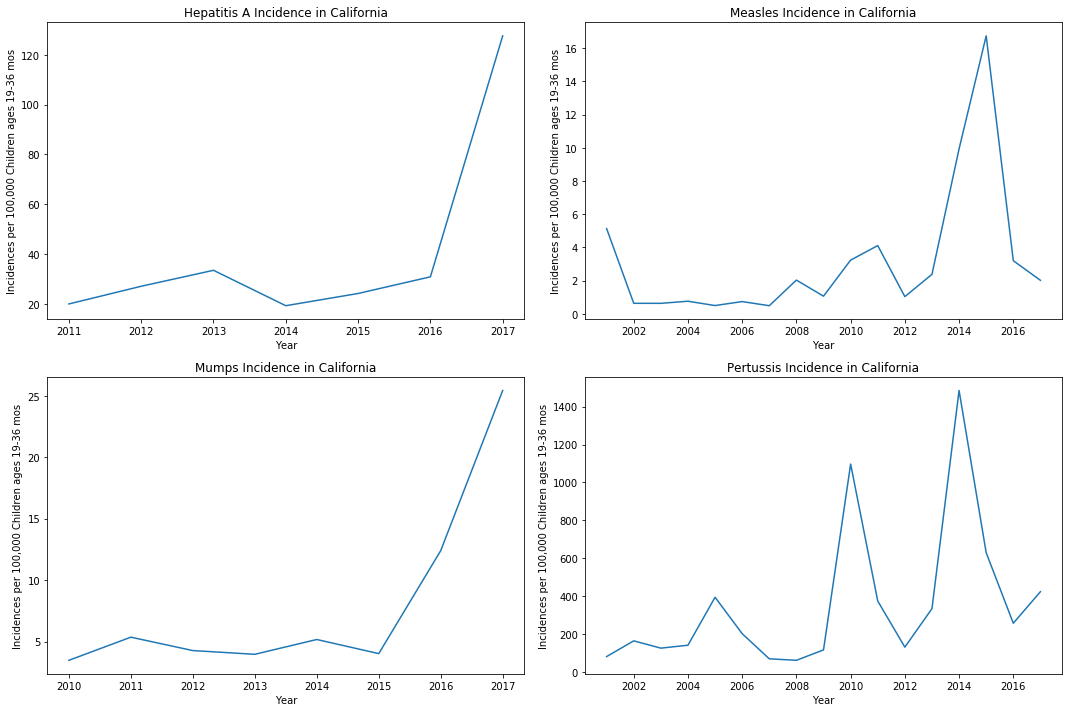

In [118]:
plt.figure(figsize=(15,10))
i=0
for disease in diseases_list:
    i+=1
    plt.subplot(2, 2, i)
    plt.plot(adjusted_df["year"], adjusted_df[disease])
    plt.title(disease+ " Incidence in California")
    plt.xlabel("Year")
    plt.ylabel("Incidences per 100,000 Children ages 19-36 mos")
plt.tight_layout()
plt.savefig("antivax-preventable.png", dpi=200)
plt.show()